/home/cordell/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:81: RuntimeWarning: divide by zero encountered in log10
/home/cordell/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:85: RuntimeWarning: divide by zero encountered in true_divide


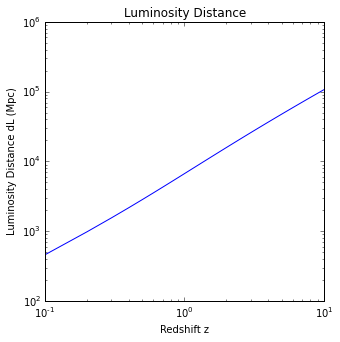

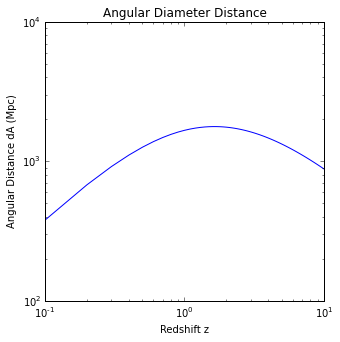

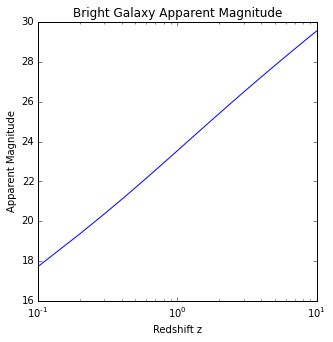

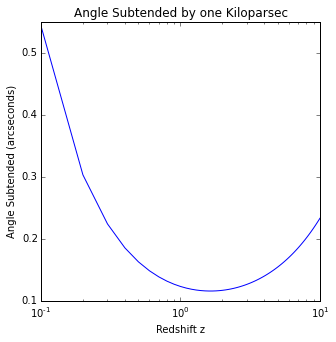

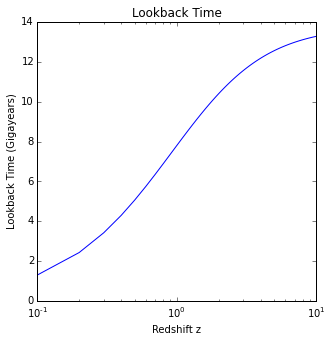

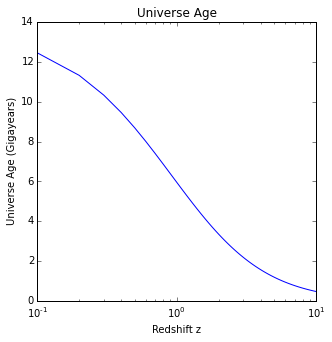

In [1]:
"""
         1         2         3         4         5         6         7      
1234567890123456789012345678901234567890123456789012345678901234567890123456

Cordell Newmiller
Prof. Lubin
PHY 267
Homework 1
Problem 4


a) Luminosity distance in Mpc (defined so that flux = luminosity/4πdL^2(z)).
b) Angular diameter distance in Mpc (defined so that θ = size/da(z)).
c) The apparent magnitude of an L∗ galaxy. Astronomers make luminosity 
functions for stars and galaxies. The galaxy luminosity function has a very 
specific form, referred to as the Schechter function. You should read, 
digest, and revere Schechter (1976, ApJ, 203, 297). You can use his value 
of M∗ for this problem. Don’t worry about K-corrections for now (see next 
problem).
d) The angle (in arcseconds) subtended by 1 kiloparsec.
e) The “lookback time” (i.e. the number of Gigayears between now 
and some redshift).
f) The age of the universe (i.e. the number of Gigayears between the 
beginning of the Universe and some redshift).

"""
import numpy
from scipy.integrate import quad
from matplotlib import pyplot
%matplotlib inline

# Jarosik 2011
OmegaB=0.0456  # Baryonic Matter
OmegaBErr=0.0016
OmegaC=0.227  # Dark Matter
OmegaCErr=0.014

OmegaM= OmegaB + OmegaC # Matter
OmegaK= 0 # Flat Universe
OmegaLambda=0.728  # Dark Energy
OmegaLambdaErr=0.016

CurrentAge = 13.75 # of Universe, in Gigayears
CurrentAgeErr=0.11

Hubble0=70.4  # km / (s Mpc)
Hubble0Err=1.4

HubbleS=Hubble0/(3.086*10**19) # H0 in s^-1

# Schechter 1976
AbsoluteMagnitude=-20.6

c=3*10**5 #km/s



zplot = numpy.arange(0,10.1,.1)


# Carroll 1992 equation 25
def LuminosityDistance(zrange):
    # Assumes flat universe
    dL=numpy.zeros(zrange.shape)
    def integrand(z):
        return ((1+z)**2 * (1+OmegaM * z) -
                z*(2+z)*OmegaLambda)**(-1/2)
    for i in numpy.arange(0,numpy.size(zrange)):
        dL[i]= c * (((1+zrange[i])/Hubble0) *
                quad(integrand,0,zrange[i])[0])
    return dL


# Carroll 1992 equation 23
def AngularDistance(zrange):
    return (1+zrange)**(-2)*LuminosityDistance(zrange)

# Class Lecture
def ApparentMagnitude(zrange):
    return AbsoluteMagnitude + 5*numpy.log10(LuminosityDistance(
            zrange)) + 25 # Plus 25 instead of minus 5, for Mpc

# Carroll 1992 equation 19
def AngleSubtended(zrange): # of one kpc, in arcseconds
    return (180/numpy.pi)*60*60*.001/AngularDistance(zrange) 

# Carroll 1992 equation 16
def LookbackTime(zrange):
    # Assumes flat universe
    time=numpy.zeros(zrange.shape)
    def integrand(z):
        return (1+z)**(-1)*((1+z)**2 * (1+OmegaM * z) -
                z*(2+z)*OmegaLambda)**(-1/2)
    for i in numpy.arange(0,numpy.size(zrange)):
        time[i]=(1/(3.154*10**7)) *(10**(-9))* ((1/HubbleS) *
                quad(integrand,0,zrange[i])[0])
    return time

def UniverseAge(zrange):
    return CurrentAge - LookbackTime(zrange)


figure1 = pyplot.figure(figsize=(5,5))
pyplot.title('Luminosity Distance')
pyplot.plot(zplot,LuminosityDistance(zplot),'b-')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Luminosity Distance dL (Mpc)')
pyplot.xscale('log')
pyplot.yscale('log')

figure2 = pyplot.figure(figsize=(5,5))
pyplot.title('Angular Diameter Distance')
pyplot.plot(zplot,AngularDistance(zplot),'b-')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Angular Distance dA (Mpc)')
pyplot.xscale('log')
pyplot.yscale('log')

figure3 = pyplot.figure(figsize=(5,5))
pyplot.title('Bright Galaxy Apparent Magnitude')
pyplot.plot(zplot,ApparentMagnitude(zplot),'b-')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Apparent Magnitude')
pyplot.xscale('log')

figure4 = pyplot.figure(figsize=(5,5))
pyplot.title('Angle Subtended by one Kiloparsec')
pyplot.plot(zplot,AngleSubtended(zplot),'b-')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Angle Subtended (arcseconds)')
pyplot.xscale('log')

figure5 = pyplot.figure(figsize=(5,5))
pyplot.title('Lookback Time')
pyplot.plot(zplot,LookbackTime(zplot),'b-')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Lookback Time (Gigayears)')
pyplot.xscale('log')

figure5 = pyplot.figure(figsize=(5,5))
pyplot.title('Universe Age')
pyplot.plot(zplot,UniverseAge(zplot),'b-')
pyplot.xlabel('Redshift z')
pyplot.ylabel('Universe Age (Gigayears)')
pyplot.xscale('log')
